<a href="https://colab.research.google.com/github/Nayeem1028/Simulation-and-Modeling-Lab/blob/main/SIM_Lab_Assignment_04_2215151028_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ID: 2215151028**

**Name** : Nayeem Islam

**Section** : 7A2




---




#**Task**

## Generate two sets of from a normal distribution and perform a two-sample t-test.##

- Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation.


- Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation.


Use and determine whether the means differ significantly.

Sample 1 Mean: 47.41
Sample 2 Mean: 55.34
t-Statistic: -3.90
Degrees of Freedom: 93.93
p-Value: 0.0002
Confidence Interval of Mean Difference: [-11.95, -3.89]
Reject the null hypothesis. The means of the two samples are significantly different.


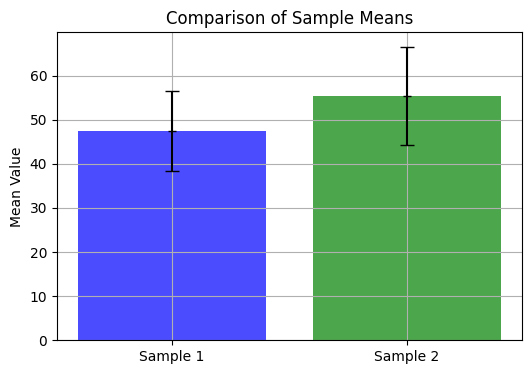

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define parameters
mu1, sigma1, n1 = 50, 10, 50  # Mean, Std Dev, Sample Size for Sample 1
mu2, sigma2, n2 = 55, 12, 50  # Mean, Std Dev, Sample Size for Sample 2

# Generate random samples

data1 = np.random.normal(mu1, sigma1, n1)
data2 = np.random.normal(mu2, sigma2, n2)

# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False)

# Compute confidence interval
mean_diff = np.mean(data1) - np.mean(data2)
std_err = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))
df = (std_err**4) / ((np.var(data1, ddof=1)/len(data1))**2 / (len(data1)-1) + (np.var(data2, ddof=1)/len(data2))**2 / (len(data2)-1))
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

# Display results
print(f"Sample 1 Mean: {np.mean(data1):.2f}")
print(f"Sample 2 Mean: {np.mean(data2):.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.2f}, {ci[1]:.2f}]")

# Hypothesis testing decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two samples are not significantly different.")

# Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Sample 1', 'Sample 2'], [np.mean(data1), np.mean(data2)], color=['blue', 'green'], alpha=0.7)
plt.errorbar(['Sample 1', 'Sample 2'], [np.mean(data1), np.mean(data2)], yerr=[np.std(data1, ddof=1), np.std(data2, ddof=1)], fmt='k_', capsize=5)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()
